<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Theory-and-Setup" data-toc-modified-id="Theory-and-Setup-1">Theory and Setup</a></span><ul class="toc-item"><li><span><a href="#Guitar-Signal-Input" data-toc-modified-id="Guitar-Signal-Input-1.1">Guitar Signal Input</a></span></li><li><span><a href="#FFT" data-toc-modified-id="FFT-1.2">FFT</a></span><ul class="toc-item"><li><span><a href="#Changing-Domains" data-toc-modified-id="Changing-Domains-1.2.1">Changing Domains</a></span></li><li><span><a href="#There-are-4-variants" data-toc-modified-id="There-are-4-variants-1.2.2">There are 4 variants</a></span></li><li><span><a href="#Fast-Fourier-Transform" data-toc-modified-id="Fast-Fourier-Transform-1.2.3">Fast Fourier Transform</a></span></li></ul></li></ul></li><li><span><a href="#Practical" data-toc-modified-id="Practical-2">Practical</a></span><ul class="toc-item"><li><span><a href="#Time-to-Frequency" data-toc-modified-id="Time-to-Frequency-2.1">Time to Frequency</a></span></li><li><span><a href="#Play-a-chord" data-toc-modified-id="Play-a-chord-2.2">Play a chord</a></span></li><li><span><a href="#What-devices-are-connected?" data-toc-modified-id="What-devices-are-connected?-2.3">What devices are connected?</a></span></li></ul></li><li><span><a href="#Homework" data-toc-modified-id="Homework-3">Homework</a></span></li></ul></div>

# Theory and Setup

## Guitar Signal Input

<img src='diagrams/analog_to_numpy.png'>

## FFT

### Changing Domains
Fourier transform allows us to go form the time domain to the frequency domain

<img src="diagrams/FFT.gif">

### There are 4 variants
Because the math has some limitations and implications, we have 4 different Fourier transforms. Each for a combination of discrete and continuous time and frequency.

<img src='diagrams/variations_of_fourier_transforms.png'>

### Fast Fourier Transform
We can't do much with the standard `DTFT` algorithm, so we use the `FFT` which is the **Fast** Fourier Transform and for sample as a power of 2, in other words, $2^1, 2^2, 2^3, 2^4, 2^5, etc.$ 

# Practical

+ We will be using the `soundcard` package to open a connection from our pc to the DI (Direct Input).
+ `pandas` is for DataFrame creation and manipulation
+ `seabourn` and `matplotlib.pyplot` for plotting our results

In [11]:
import soundcard as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "retina"
from IPython.display import HTML

## Time to Frequency
Let's get some intuition about going from the time domain to the frequency domain.


We'll create a 5kHz sinusoid and see what it's frequency spectrum looks like.


$$y(t) = A\sin (2\pi ft + \varphi ) = A\sin (\omega t + \varphi )$$

$A$ = the amplitude, the peak deviation of the function from zero.

$f$ = the ordinary frequency, the number of oscillations (cycles) that occur each second of time.

$\omega$ = $2 \pi f$, the angular frequency, the rate of change of the function argument in units of radians per second

${\displaystyle \varphi }$  = the phase, specifies (in radians) where in its cycle the oscillation is at t = 0.

In [12]:
# Sampling rate
fs = 48000 # samples/second

length = 1 # seconds
N = fs * length
t = np.linspace(0, length, num = N, endpoint = False)

# Generate a sinusoid at frequency f
f = 5000 # Hz
y = np.sin(2 * np.pi * f * t)

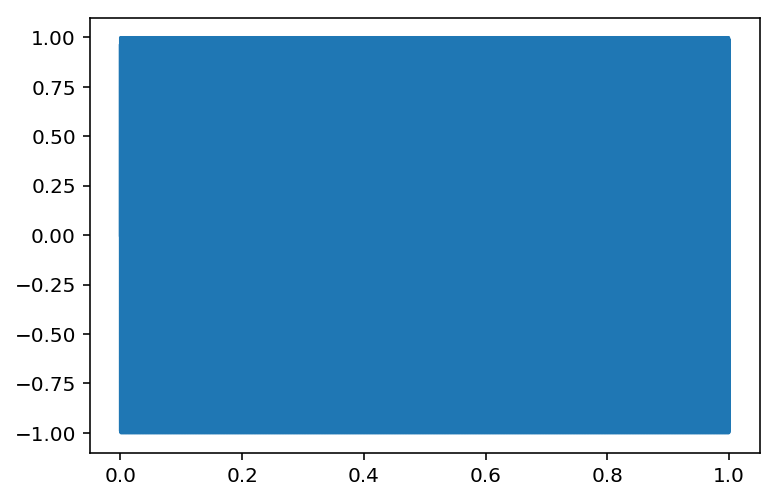

In [16]:
plt.plot(t, y)

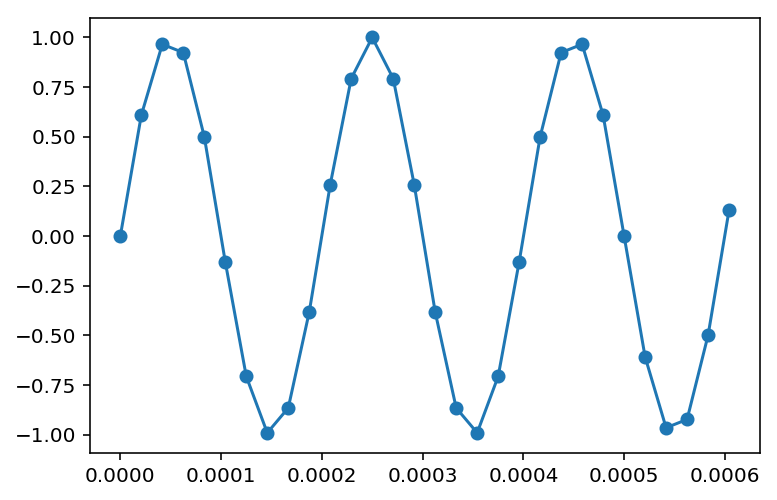

In [28]:
plt.plot(t[0:30], y[0:30], 'o-')

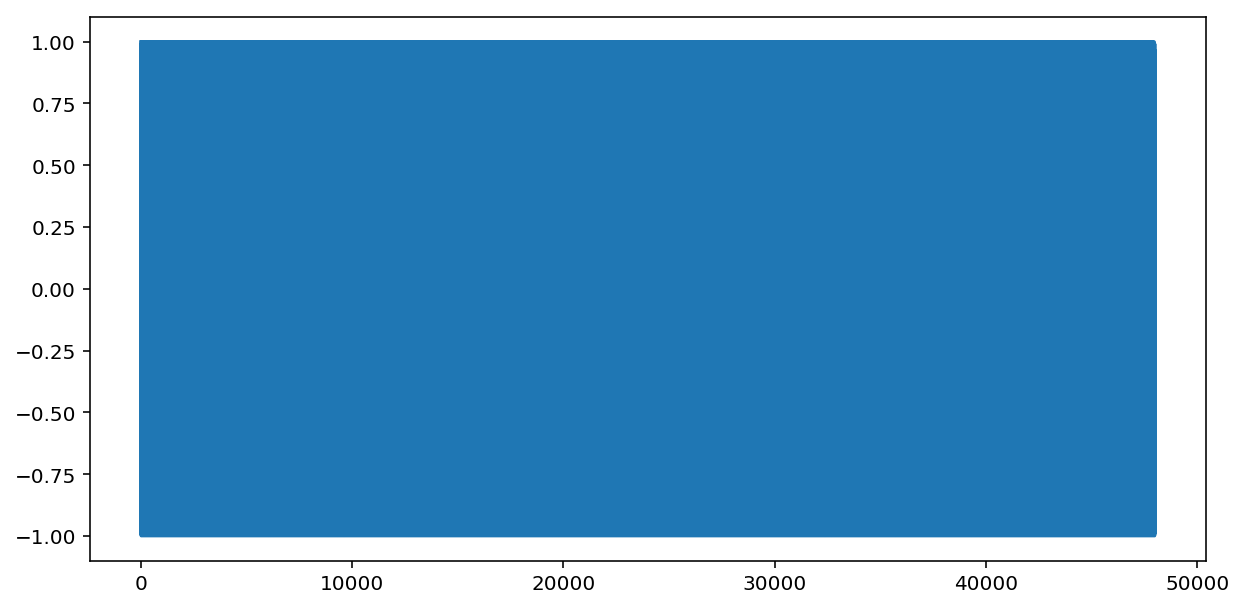

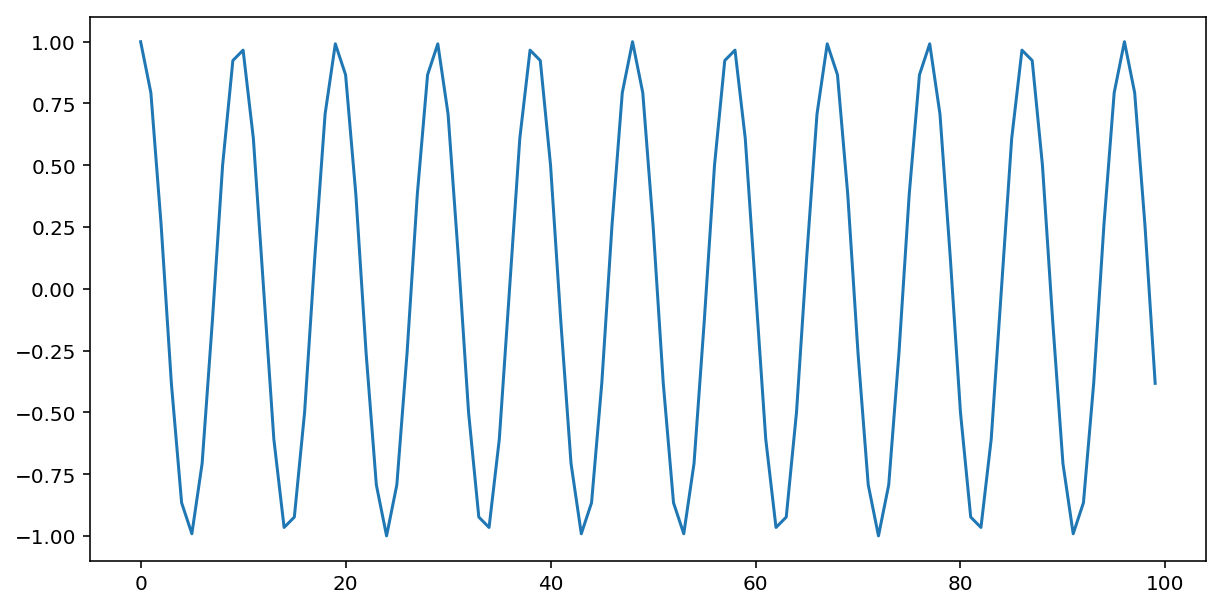

In [3]:
plt.figure(figsize=(10,5))
plt.plot(a)

plt.figure(figsize=(10,5))
plt.plot(a[0:100])

## Play a chord

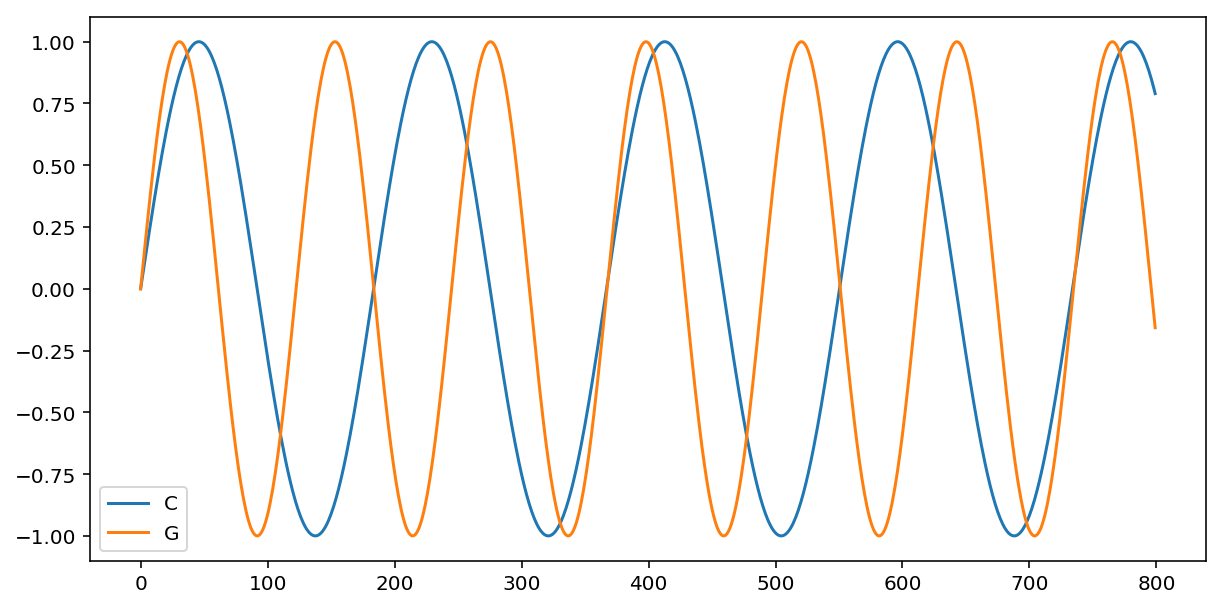

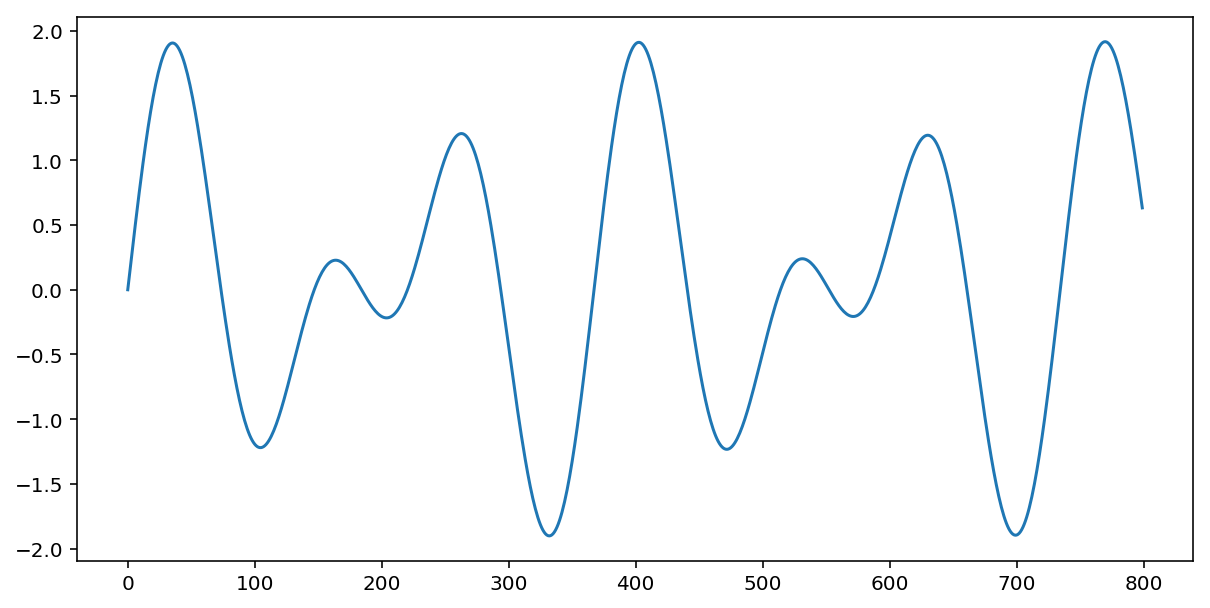

In [31]:
# Sampling rate
fs = 48000 # samples/second

length = 1 # seconds
N = fs * length
t = np.linspace(0, length, num = N, endpoint = False)

# Generate a sinusoid at frequency f
C4_freq = 261.63 # Hz
G4_freq = 392

y_C4 = np.sin(2 * np.pi * C4_freq * t) 
y_G4 = np.sin(2 * np.pi * G4_freq * t) 

y_C4_G4 = y_C4 + y_G4

plt.figure(figsize=(10,5))
plt.plot(y_C4[0:800], label='C')
plt.plot(y_G4[0:800], label='G')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(y_C4_G4[0:800])


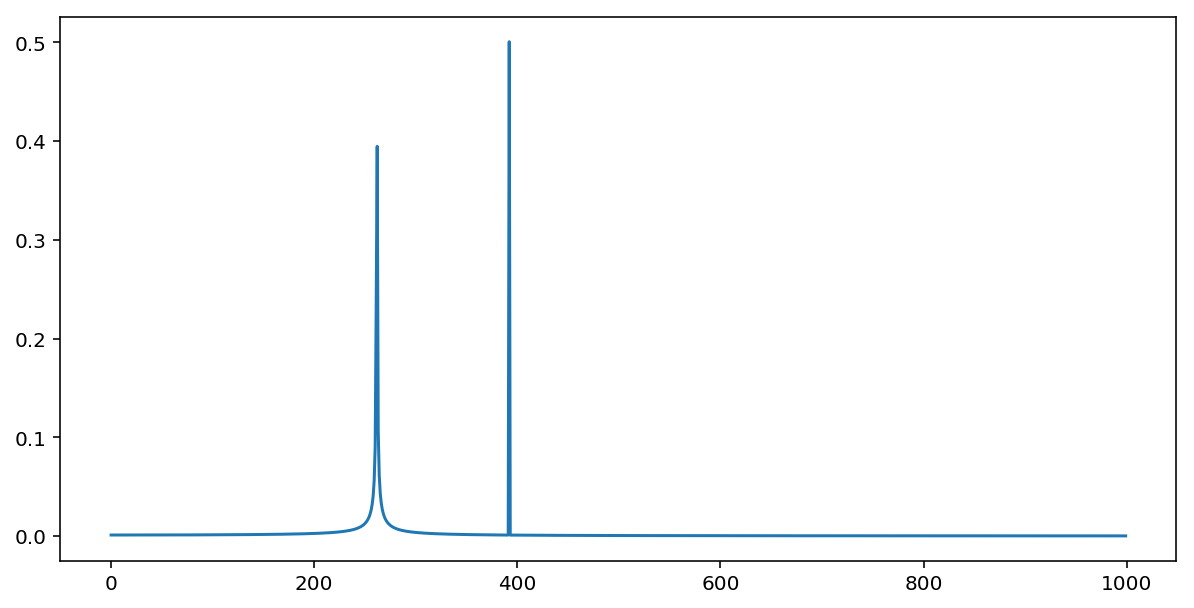

In [35]:
# Use FFT to get the amplitude of the spectrum
y_fft = 1/N * abs(np.fft.fft(y_C4_G4))

plt.figure(figsize=(10,5))
plt.plot(y_fft[0:1000])

 
#plt.text(np.argmax(ampl), ampl[np.argmax(ampl)], ' freq: %.2fHz'%np.argmax(ampl))

In [36]:
np.argmax(y_fft)

392

## What devices are connected?

In [37]:
# get a list of all speakers:
speakers = sc.all_speakers()
# get a list of all microphones:
mics = sc.all_microphones()

print('='*25+'\navailable speakers:\n')
for speaker in speakers:
    print(speaker)
    
print('='*25+'\navailable microphones:\n')
for mic in mics:
    print(mic)

available speakers:

<Speaker AirBeamTV Audio (2 channels)>
<Speaker Built-in Output (2 channels)>
<Speaker Scarlett Solo USB (2 channels)>
available microphones:

<Microphone AirBeamTV Audio (2 channels)>
<Microphone Built-in Microphone (2 channels)>
<Microphone Scarlett Solo USB (2 channels)>


# Homework

In [ ]:
y_Am = y_A3 + y_C3 + y_E3

+ draw 10kHz sinusoid and call it y1
+ draw a 10kHz + 15kHz and call it y2
+ take your y2 and draw the FFT
+ draw a Am chord in the time domain... A, C and E note:
    + A3: 220.00Hz
    + C3: 261.63Hz
    + E3: 329.63Hz
   and call it y_Am
+ Draw the FFT of y_Am